In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import glob, os

def clean_hmotnost(text):
    m = re.search(r'(\d+(,|\.)\d+)(\s*KG)?', str(text), flags=re.I)
    if m:
        return float(m.group(1).replace(',', '.'))
    return None
classes = '(Tourney|Altus|Acera|Alivio|Deore|SLX|XTR|XT)'

# Load data
data = pd.concat(map(pd.read_csv, glob.glob("data/*.csv")), sort=False)

# normalize
#data['price'] = data['price'].astype(pd.Int64Dtype())
data['Rok'] = data['Rok'].astype(pd.Int64Dtype())
data['Hmotnost'] = data['Hmotnost'].apply(clean_hmotnost)

# Conditions
data = data[(data['price'] > 19000) & (data['price'] < 25000)]
#data = data[data['site'] == 'bezvakolo']
#data = data[(data['price'] > 30000)]

mojekolo     61
hupnakolo    24
bezvakolo    16
mikebike      8
Name: site, dtype: int64

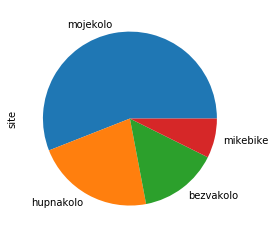

In [425]:
# graph it
data['site'].value_counts().plot(kind='pie')
data['site'].value_counts()

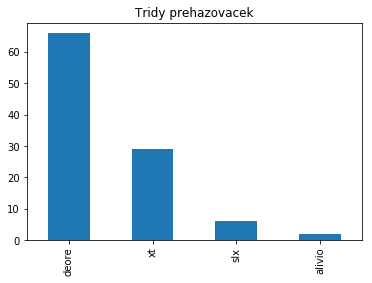

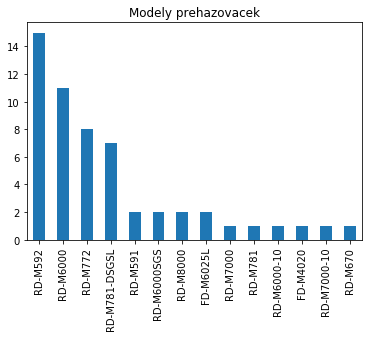

In [426]:
data['prehazovacka_class'] = data['Přehazovačka'] \
    .str.lower() \
    .str.extract(classes, re.IGNORECASE)
data['prehazovacka_class'].value_counts().plot(kind='bar', title='Tridy prehazovacek')
plt.show()

data['prehazovacka_model'] = data['Přehazovačka'] \
    .str.replace('(,|/|#|®)', ' ') \
    .str.replace('\s{2,}', ' ') \
    .str.extract('\s([A-Z]{2}-[^\s]+)')
data['prehazovacka_model'].value_counts().plot(kind='bar', title='Modely prehazovacek')

## Hmotnost

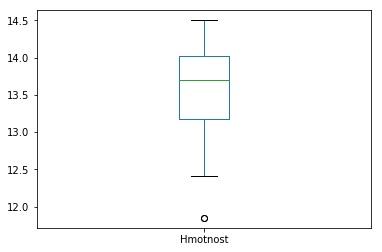

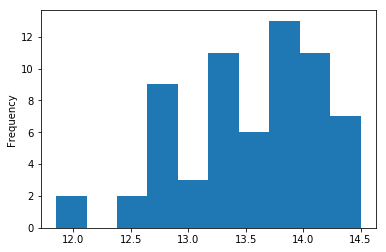

count    64.000000
mean     13.540312
std       0.619465
min      11.850000
25%      13.175000
50%      13.700000
75%      14.015000
max      14.500000
Name: Hmotnost, dtype: float64

In [427]:
data['Hmotnost'].plot.box(); plt.show()
data['Hmotnost'].plot.hist(); plt.show()
data['Hmotnost'].describe()

## Cena

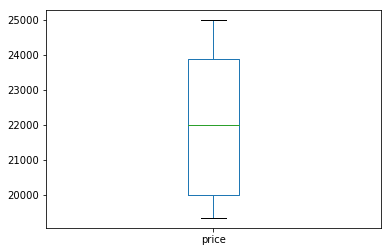

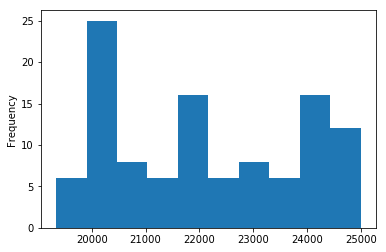

count      109.000000
mean     22109.366972
std       1773.076823
min      19339.000000
25%      19999.000000
50%      21999.000000
75%      23890.000000
max      24990.000000
Name: price, dtype: float64

In [428]:
data['price'].plot.box(); plt.show()
data['price'].plot.hist(); plt.show()
data['price'].describe()

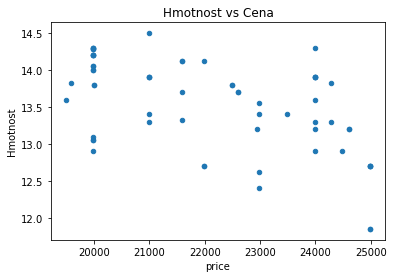

In [429]:
data.plot.scatter(x='price', y='Hmotnost', title='Hmotnost vs Cena')

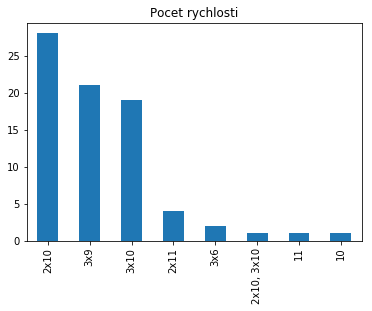

In [430]:
data['Počet rychlostí'] = data['Počet rychlostí'].replace({27: '3x9', 20: '2x10', 30: '3x10', 22: '2x11', 18: '3x6'})
data['Počet rychlostí'].value_counts().plot(kind='bar', title='Pocet rychlosti')

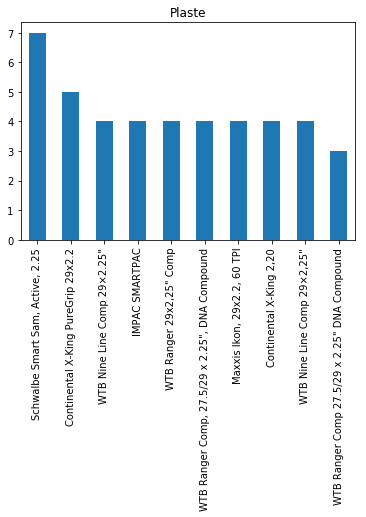

In [431]:
plaste = data['Pláště'].value_counts()
plaste[plaste > 1][0:10].plot(kind='bar', title='Plaste')

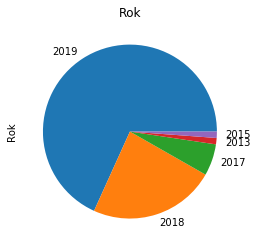

In [432]:
data['Rok'].value_counts().plot(kind='pie', title='Rok')

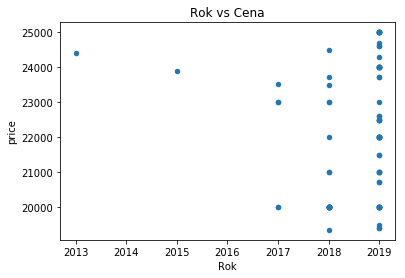

In [439]:
data.plot.scatter(x='Rok', y='price', title='Rok vs Cena')

In [433]:
data.to_csv('/tmp/a.csv')